<a href="https://colab.research.google.com/github/rubenray/Vision-por-computadora-MAR/blob/main/Vision_Por_computadora_Tema_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalación de librerías (versiones recomendadas)

In [ ]:
!pip install opencv-python==4.9.0.80
!pip install numpy==1.26.4
!pip install matplotlib==3.8.3
!pip install scikit-image==0.22.0

1. Definición y aplicaciones — Ejemplo simple de carga y visualización

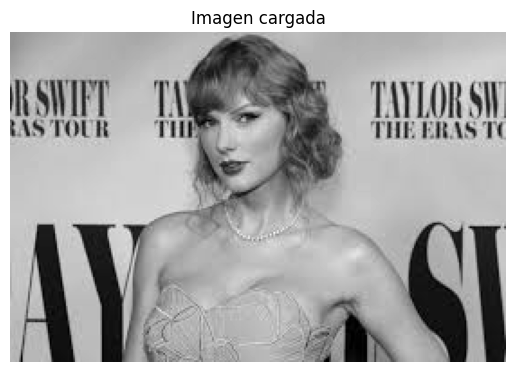

In [ ]:
import cv2
import matplotlib.pyplot as plt


# Cargar imagen en escala de grises
img = cv2.imread("/content/sample_data/imagen.jpeg", cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Error: No se pudo cargar la imagen. Asegúrese de que 'imagen.jpg' exista en el directorio y sea un formato válido.")
else:
    plt.imshow(img, cmap="gray")
    plt.title("Imagen cargada")
    plt.axis("off")
    plt.show()

1.1.1. Fundamentos del procesamiento de imágenes  , Lectura, conversión, tamaño y rotación

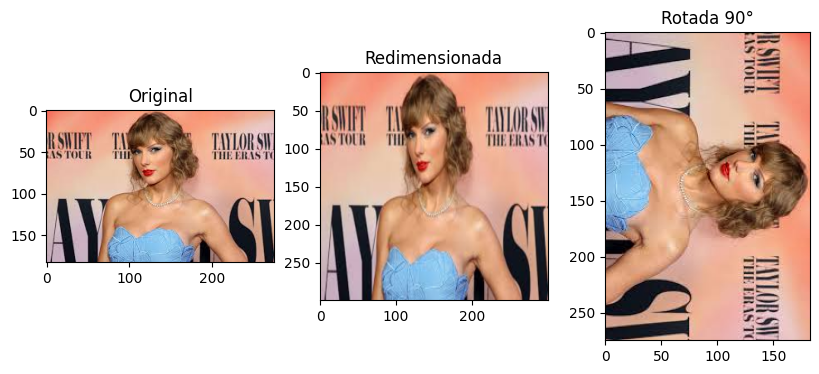

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/sample_data/imagen.jpeg")

# Convertir BGR a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Redimensionar
img_resized = cv2.resize(img_rgb, (300, 300))

# Rotar 90°
img_rot = cv2.rotate(img_rgb, cv2.ROTATE_90_CLOCKWISE)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1,3,2); plt.imshow(img_resized); plt.title("Redimensionada")
plt.subplot(1,3,3); plt.imshow(img_rot); plt.title("Rotada 90°")
plt.show()


1.1.2. Entorno de desarrollo y bibliotecas

Ejemplo verificando versiones:

In [ ]:
import cv2, numpy as np, matplotlib, skimage

print("OpenCV:", cv2.__version__)
print("NumPy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Scikit-image:", skimage.__version__)

OpenCV: 4.9.0
NumPy: 1.26.4
Matplotlib: 3.8.3
Scikit-image: 0.22.0


1.1.3. Preprocesamiento de imágenes: filtrado, contraste, suavizado
🔹 Filtro Gaussiano + Canny

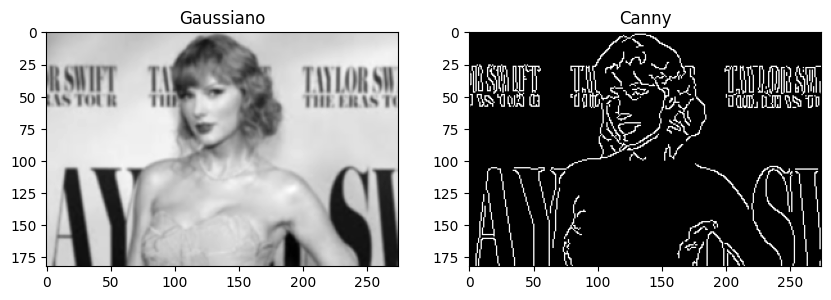

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/sample_data/imagen.jpeg", 0)

gauss = cv2.GaussianBlur(img, (5,5), 1)
edges = cv2.Canny(gauss, 80, 150)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(gauss, cmap="gray"); plt.title("Gaussiano")
plt.subplot(1,2,2); plt.imshow(edges, cmap="gray"); plt.title("Canny")
plt.show()


Ajuste de contraste CLAHE

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/sample_data/oscura.jpeg", 0)

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img)

plt.subplot(1,2,1); plt.imshow(img, cmap="gray"); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(img_clahe, cmap="gray"); plt.title("CLAHE")
plt.show()


1.2. Segmentación de imágenes
🔹 Umbralización (Otsu)

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/sample_data/imagen.jpeg", 0)
_, th = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

plt.imshow(th, cmap="gray")
plt.title("Segmentación por Otsu")
plt.axis("off")
plt.show()


Segmentación por K-Means

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/sample_data/imagen.jpeg")
Z = img.reshape((-1,3)).astype(np.float32)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
K = 3
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

segmented = centers[labels.flatten()].reshape(img.shape)

plt.imshow(cv2.cvtColor(segmented.astype("uint8"), cv2.COLOR_BGR2RGB))
plt.title("Segmentación K-means")
plt.axis("off")
plt.show()

Extracción de características
🔹 Detección de bordes Sobel

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/sample_data/imagen.jpeg", 0)

sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

mag = cv2.magnitude(sobelx, sobely)

plt.imshow(mag, cmap="gray")
plt.title("Magnitud del gradiente (Sobel)")
plt.axis("off")
plt.show()


🔹 Detección de esquinas (Harris)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/sample_data/imagen.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

harris = cv2.cornerHarris(gray, 2, 3, 0.04)
img[harris > 0.01*harris.max()] = [0,0,255]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Esquinas Harris")
plt.axis("off")
plt.show()


1.2.1. Transformaciones geométricas

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/sample_data/imagen.jpeg")

# Escalado y rotación
M = cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), 30, 1.2)
rot = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

plt.imshow(cv2.cvtColor(rot, cv2.COLOR_BGR2RGB))
plt.title("Transformación Geométrica: Rotación 30° y escala 1.2")
plt.axis("off")
plt.show()


1.2.2. Transformaciones afines

In [ ]:


import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/sample_data/imagen.jpeg")

pts1 = np.float32([[10,10], [200,50], [50,200]])
pts2 = np.float32([[20,30], [220,80], [80,250]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title("Transformación Afín")
plt.axis("off")
plt.show()

